## Bounding box segmentation
Some models have some capabilities in bounding-box segmentation of objects. Goal of this task is to draw a minimum sized surrounding rectangle around objects in an image.

In [1]:
import anthropic
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream, extract_json, prompt_kisski
import base64
import json

In [2]:
cat_image = imread("data/real_cat.png")

```json
{
  "x": 6,
  "y": 10,
  "width": 427,
  "height": 408
}
```


[[[176 178 179]
  [175 178 178]
  [177 177 180]
  ...
  [182 186 188]
  [185 188 191]
  [191 194 197]]

 [[178 180 181]
  [178 179 181]
  [178 180 181]
  ...
  [185 189 192]
  [187 191 192]
  [191 195 198]]

 [[181 183 185]
  [180 182 183]
  [180 181 183]
  ...
  [190 193 196]
  [189 193 196]
  [192 195 198]]

 ...

 [[125  91  66]
  [124  90  65]
  [123  89  65]
  ...
  [137  92  64]
  [136  91  62]
  [135  89  61]]

 [[122  88  64]
  [121  87  63]
  [121  87  63]
  ...
  [142  96  68]
  [142  96  68]
  [139  94  65]]

 [[120  86  62]
  [120  86  60]
  [119  85  61]
  ...
  [144  99  70]
  [144  99  70]
  [142  97  68]]]
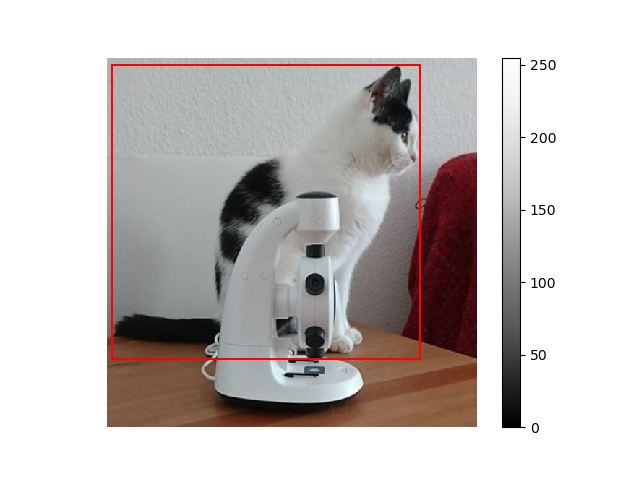
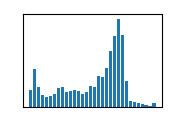

In [4]:
reply = prompt_kisski("""
Give me a json object of a bounding boxes around the cat in this image. 
The format should be exactly like this: {'x':int,'y':int,'width':int,'height':int}
""", cat_image)
print(reply)
bb = json.loads(extract_json(reply))
bb

stackview.add_bounding_boxes(cat_image, [bb])

Bounding box segmentation using vision language models are an active research field. To see how well this works, we can inspect a couple of images.

In [5]:
visualizations = []

for filename in ["data/pinata.jpg", "data/real_cat.png", "data/sheeps.jpg", "data/guinea_pig.jpg"]:
    image = imread(filename)
    
    reply = prompt_kisski("""Give me a json object of a list of bounding boxes around each animal in this 512x512 pixel large image. 
The format should be like this:

```json
[
    {
        "x":int,
        "y":int, 
        "width":int, 
        "height":int,
        "description":str,
        "font_size":25
    }
]
```
""", image)

    bb = json.loads(extract_json(reply))

    vis = stackview.add_bounding_boxes(image, bb)
    visualizations.append(vis)


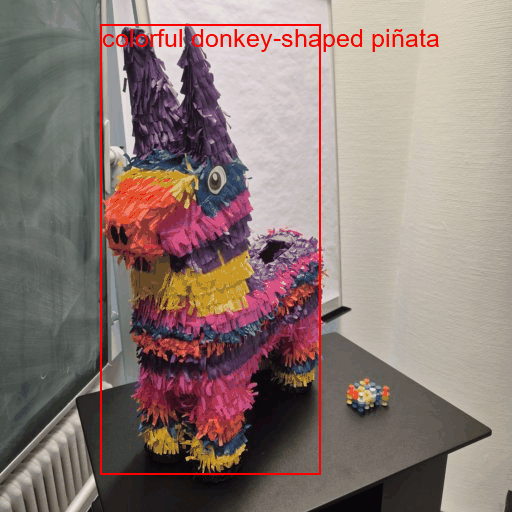

In [6]:
stackview.animate(visualizations, frame_delay_ms=2000)

## Exercise
Load blobs.tif and ask claude to draw bounding boxes around the white blobs.